<a href="https://colab.research.google.com/github/alice9547/covid-19_model/blob/khw/corona19_fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

본 프로그램은 https://github.com/kairess/corona-virus-prediction의 
응용임을 밝힙니다.

In [1]:
import pandas as pd # 텍스트 입출력 및 데이터프레임 가공이 가능 한 라이브러리
import plotly.graph_objs as go # 그래프 라이브러리
import plotly.offline as py
from fbprophet import Prophet # 시계열 예측 라이브러리
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

import numpy as np #행렬이나 다차원 배열을 처리할때 사용하는 라이브러리


In [3]:
data = pd.read_csv('/corona19_regional.csv')# pandas데이터 프레임을 이용하여 csv파일을 읽어옴
data.head()# 데이터가 잘 출력 되는지 5행만 출력해 살펴보며 확인

,DATE,JONGNO,JONGNO_ADD,JUNGGU,JUNGGU_ADD,YONGSAN,YONGSAN_ADD,SEONGDONG,SEONGDONG_ADD,GWANGJIN,GWANGJIN_ADD,DDM,DDM_ADD,JUNGNANG,JUNGNANG_ADD,SEONGBUK,SEONGBUK_ADD,GANGBUK,GANGBUK_ADD,DOBONG,DOBONG_ADD,NOWON,NOWON_ADD,EP,EP_ADD,SDM,SDM_ADD,MAPO,MAPO_ADD,YANGCHEON,YANGCHEON_ADD,GURO,GURO_ADD,GEUMCHEON,GEUMCHEON_ADD,YDP,YDP_ADD,DONGJAK,DONGJAK_ADD,GWANAK,GWANAK_ADD,SEOCHO,SEOCHO_ADD,GANGNAM,GANGNAM_ADD,GANGDONG,GANGDONG_ADD,ETC,ETC_ADD
0,2021.11.16.00,2365,13,2336,14,3388,10,3660,38,4371,23,5212,57,4834,37,5359,64,3719,25,3602,35,5437,26,5646,20,3484,19,4681,29,4322,25,6651,58,3225,23,6376,64,5221,19,7057,38,5215,25,8425,37,5500,31,9271,40
1,2021.11.15.00,2352,15,2322,14,3378,18,3622,23,4348,19,5155,44,4797,29,5295,55,3694,15,3567,26,5411,42,5626,30,3465,10,4652,21,4297,34,6593,38,3202,19,6312,56,5202,31,7019,32,5190,27,8388,42,5469,78,9232,47
2,2021.11.08.00,2240,6,2208,12,3275,10,3455,16,4208,23,4818,24,4602,27,5000,21,3525,22,3375,18,5063,36,5341,42,3310,19,4487,17,4060,20,6241,50,3032,19,5930,49,5016,19,6656,42,4979,26,8133,31,5107,34,8818,51
3,2021.11.07.00,2234,12,2196,9,3265,12,3439,19,4184,24,4794,42,4574,27,4979,38,3503,18,3357,31,5027,45,5299,44,3291,12,4470,17,4040,31,6192,48,3013,48,5881,49,4997,17,6614,54,4953,28,8102,34,5073,53,8767,41
4,2021.11.06.00,2222,12,2187,19,3253,15,3420,24,4160,22,4752,40,4547,27,4941,35,3485,29,3326,40,4982,46,5255,53,3279,19,4453,14,4009,30,6158,66,2965,40,5832,49,4980,28,6559,57,4925,38,8068,25,5020,40,8712,51


In [4]:
지역구 = input("지역구 = ")
dc = data.loc[  : ,  ['DATE', 지역구 ] ]#필요한 데이터는 날짜와 일일확진자수 이므로 이둘을 추출한다.
dc = dc.reset_index().rename(columns={ 지역구 : 'daily_confirmed'}) #일일 확진자로  이름을 바꾼다.

dc.head()#값이 잘나오는지 헤더 출력으로  확인


지역구 = JONGNO_ADD


,index,DATE,daily_confirmed
0,0,2021.11.16.00,13
1,1,2021.11.15.00,15
2,2,2021.11.08.00,6
3,3,2021.11.07.00,12
4,4,2021.11.06.00,12


In [9]:
#그래프를 그려보자 (Line plotly)
fig = go.Figure()
fig['layout']['xaxis']['autorange'] = "reversed"

fig.add_trace(
    go.Scatter(
        x=dc.DATE,
        y=dc.daily_confirmed,
        name='daily confirmed in Seoul '
    )
)

fig

prophet에 대한 자세한 내용 : https://facebook.github.io/prophet/docs/trend_changepoints.html

In [10]:
dc_prophet = dc.rename(columns={
    'DATE': 'ds',
    'daily_confirmed': 'y'
})

dc_prophet.head()

,index,ds,y
0,0,2021.11.16.00,13
1,1,2021.11.15.00,15
2,2,2021.11.08.00,6
3,3,2021.11.07.00,12
4,4,2021.11.06.00,12


In [11]:
m = Prophet(
    changepoint_prior_scale=0.5, # scale값을 증가시키면 더 유연해진다.
    changepoint_range=0.95, # 시계열의 첫 98%에 잠재적 변화점을 배치한다.
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=True,# 우리는 일일 확진자 증가만을 예측한다.
    seasonality_mode='additive'
)

m.fit(dc_prophet)

future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)

fig = plot_plotly(m, forecast)
py.iplot(fig)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


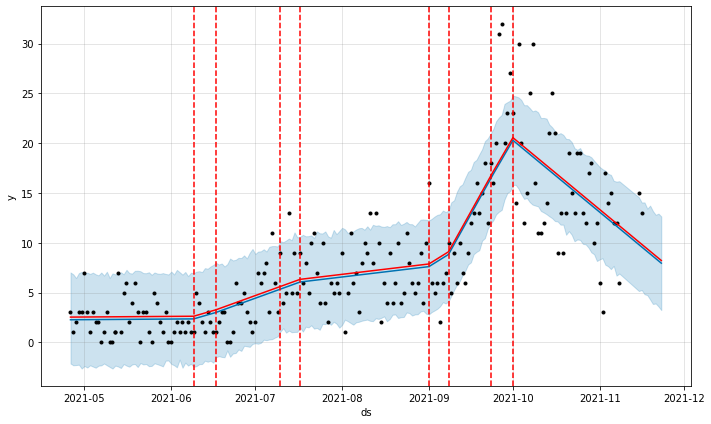

In [12]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)